# CASE STUDY on *BellaBeat* 
 Source:  [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)


## About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned
itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available
through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has
invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital
marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and
consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google
Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has
asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain
insight into how people are already using their smart devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

## Questions for analysis 

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## Business Task

Analysis of smart device usage data in order to gain insights into how consumers use smart devices and a high level recommendation for how these trends can influence Bellabeat's marketing strategy. 

## Let's load the packages 


In [1]:
install.packages("tidverserse")
install.packages("here")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("janitor")
install.packages("readr")
install.packages("lubridate")

library(tidyverse)
library(here)
library(ggplot2)
library(dplyr)
library(tidyr)
library(janitor)
library(readr)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidverserse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘here’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Install

## Let's load the datasets for the analysis

In [2]:
calories<-read_csv("/kaggle/input/casestudy1/hourlyCalories_merged.csv")
intensity<-read_csv("/kaggle/input/casestudy1/hourlyIntensities_merged.csv")
steps<-read_csv("/kaggle/input/casestudy1/hourlySteps_merged.csv")
daily_activity<-read_csv("/kaggle/input/casestudy1/dailyActivity_merged.csv")
heart_rate<-read_csv("/kaggle/input/casestudy1/heartrate_seconds_merged.csv")

Rows: 24084 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24084 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24084 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 457 Columns: 15

#### Let's have a look at our datasets

In [3]:
head(daily_activity)
head(intensity)
head(calories)
head(steps)
head(heart_rate)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,3/12/2016 12:00:00 AM,0,0
1503960366,3/12/2016 1:00:00 AM,0,0
1503960366,3/12/2016 2:00:00 AM,0,0
1503960366,3/12/2016 3:00:00 AM,0,0
1503960366,3/12/2016 4:00:00 AM,0,0
1503960366,3/12/2016 5:00:00 AM,0,0


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,3/12/2016 12:00:00 AM,48
1503960366,3/12/2016 1:00:00 AM,48
1503960366,3/12/2016 2:00:00 AM,48
1503960366,3/12/2016 3:00:00 AM,48
1503960366,3/12/2016 4:00:00 AM,48
1503960366,3/12/2016 5:00:00 AM,48


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,3/12/2016 12:00:00 AM,0
1503960366,3/12/2016 1:00:00 AM,0
1503960366,3/12/2016 2:00:00 AM,0
1503960366,3/12/2016 3:00:00 AM,0
1503960366,3/12/2016 4:00:00 AM,0
1503960366,3/12/2016 5:00:00 AM,0


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/1/2016 7:54:00 AM,93
2022484408,4/1/2016 7:54:05 AM,91
2022484408,4/1/2016 7:54:10 AM,96
2022484408,4/1/2016 7:54:15 AM,98
2022484408,4/1/2016 7:54:20 AM,100
2022484408,4/1/2016 7:54:25 AM,101


#### We have noticed that some of our datsets have a single column for date and time. Having such a colomn makes it difficult for us to analyze the datsets. So, let's fix this:

In [4]:
calories$ActivityHour=as.POSIXct(calories$ActivityHour,format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time<-format(calories$ActivityHour,format="%H:%M:%S")
calories$date<-format(calories$ActivityHour,format="%m/%d/%y")
head(calories)

Id,ActivityHour,Calories,time,date
<dbl>,<dttm>,<dbl>,<chr>,<chr>
1503960366,2016-03-12 00:00:00,48,00:00:00,03/12/16
1503960366,2016-03-12 01:00:00,48,01:00:00,03/12/16
1503960366,2016-03-12 02:00:00,48,02:00:00,03/12/16
1503960366,2016-03-12 03:00:00,48,03:00:00,03/12/16
1503960366,2016-03-12 04:00:00,48,04:00:00,03/12/16
1503960366,2016-03-12 05:00:00,48,05:00:00,03/12/16


In [5]:
intensity$ActivityHour=as.POSIXct(intensity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensity$time <- format(intensity$ActivityHour, format = "%H:%M:%S")
intensity$date <- format(intensity$ActivityHour, format = "%m/%d/%y")
head(intensity)

Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-03-12 00:00:00,0,0,00:00:00,03/12/16
1503960366,2016-03-12 01:00:00,0,0,01:00:00,03/12/16
1503960366,2016-03-12 02:00:00,0,0,02:00:00,03/12/16
1503960366,2016-03-12 03:00:00,0,0,03:00:00,03/12/16
1503960366,2016-03-12 04:00:00,0,0,04:00:00,03/12/16
1503960366,2016-03-12 05:00:00,0,0,05:00:00,03/12/16


In [6]:
steps$ActivityHour=as.POSIXct(steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
steps$time <- format(steps$ActivityHour, format = "%H:%M:%S")
steps$date <- format(steps$ActivityHour, format = "%m/%d/%y")
head(steps)

Id,ActivityHour,StepTotal,time,date
<dbl>,<dttm>,<dbl>,<chr>,<chr>
1503960366,2016-03-12 00:00:00,0,00:00:00,03/12/16
1503960366,2016-03-12 01:00:00,0,01:00:00,03/12/16
1503960366,2016-03-12 02:00:00,0,02:00:00,03/12/16
1503960366,2016-03-12 03:00:00,0,03:00:00,03/12/16
1503960366,2016-03-12 04:00:00,0,04:00:00,03/12/16
1503960366,2016-03-12 05:00:00,0,05:00:00,03/12/16


In [7]:
heart_rate$Time=as.POSIXct(heart_rate$Time,format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
heart_rate$time_new<-format(heart_rate$Time,format="%H:%M:%S")
heart_rate$date<-format(heart_rate$Time,format="%m/%d/%y")
heart_rate$hour<-floor_date(heart_rate$Time, "hour")
heart_rate$time<-format(heart_rate$hour,format="%H:%M:%S")
head(heart_rate)

Id,Time,Value,time_new,date,hour,time
<dbl>,<dttm>,<dbl>,<chr>,<chr>,<dttm>,<chr>
2022484408,2016-04-01 07:54:00,93,07:54:00,04/01/16,2016-04-01 07:00:00,07:00:00
2022484408,2016-04-01 07:54:05,91,07:54:05,04/01/16,2016-04-01 07:00:00,07:00:00
2022484408,2016-04-01 07:54:10,96,07:54:10,04/01/16,2016-04-01 07:00:00,07:00:00
2022484408,2016-04-01 07:54:15,98,07:54:15,04/01/16,2016-04-01 07:00:00,07:00:00
2022484408,2016-04-01 07:54:20,100,07:54:20,04/01/16,2016-04-01 07:00:00,07:00:00
2022484408,2016-04-01 07:54:25,101,07:54:25,04/01/16,2016-04-01 07:00:00,07:00:00


#### Before we start with our analysis, lets have a look at the number of distinct Id's or participants from each dataset.

In [8]:
n_distinct(daily_activity$Id)
n_distinct(intensity$Id)
n_distinct(calories$Id)
n_distinct(steps$Id)
n_distinct(heart_rate$Id)

[1] 35

[1] 34

[1] 34

[1] 34

[1] 14

#### Let's have a look at the summary statistics of one of our datasets

In [9]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

daily_activity %>%  
  select(VeryActiveDistance,
         ModeratelyActiveDistance,
         LightActiveDistance, Calories) %>%
  summary()


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :  32.0   Min.   :   0  
 1st Qu.: 1988   1st Qu.: 1.410   1st Qu.: 728.0   1st Qu.:1776  
 Median : 5986   Median : 4.090   Median :1057.0   Median :2062  
 Mean   : 6547   Mean   : 4.664   Mean   : 995.3   Mean   :2189  
 3rd Qu.:10198   3rd Qu.: 7.160   3rd Qu.:1285.0   3rd Qu.:2667  
 Max.   :28497   Max.   :27.530   Max.   :1440.0   Max.   :4562  

 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance    Calories   
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.00       Min.   :   0  
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 0.87       1st Qu.:1776  
 Median : 0.000     Median :0.0200           Median : 2.93       Median :2062  
 Mean   : 1.181     Mean   :0.4786           Mean   : 2.89       Mean   :2189  
 3rd Qu.: 1.310     3rd Qu.:0.6700           3rd Qu.: 4.46       3rd Qu.:2667  
 Max.   :21.920     Max.   :6.4000           Max.   :12.51       Max.   :4562  

### Some major takeaways from this summary:<br>
##### 1. We can see that people are mostly lightly active in the total distance they cover.
##### 2. Moreover, the sedentary minutes is also high which definitely needs to be reduced.

## Now let's analyze each dataset visually

In [10]:
install.packages("repr")
library(repr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘repr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


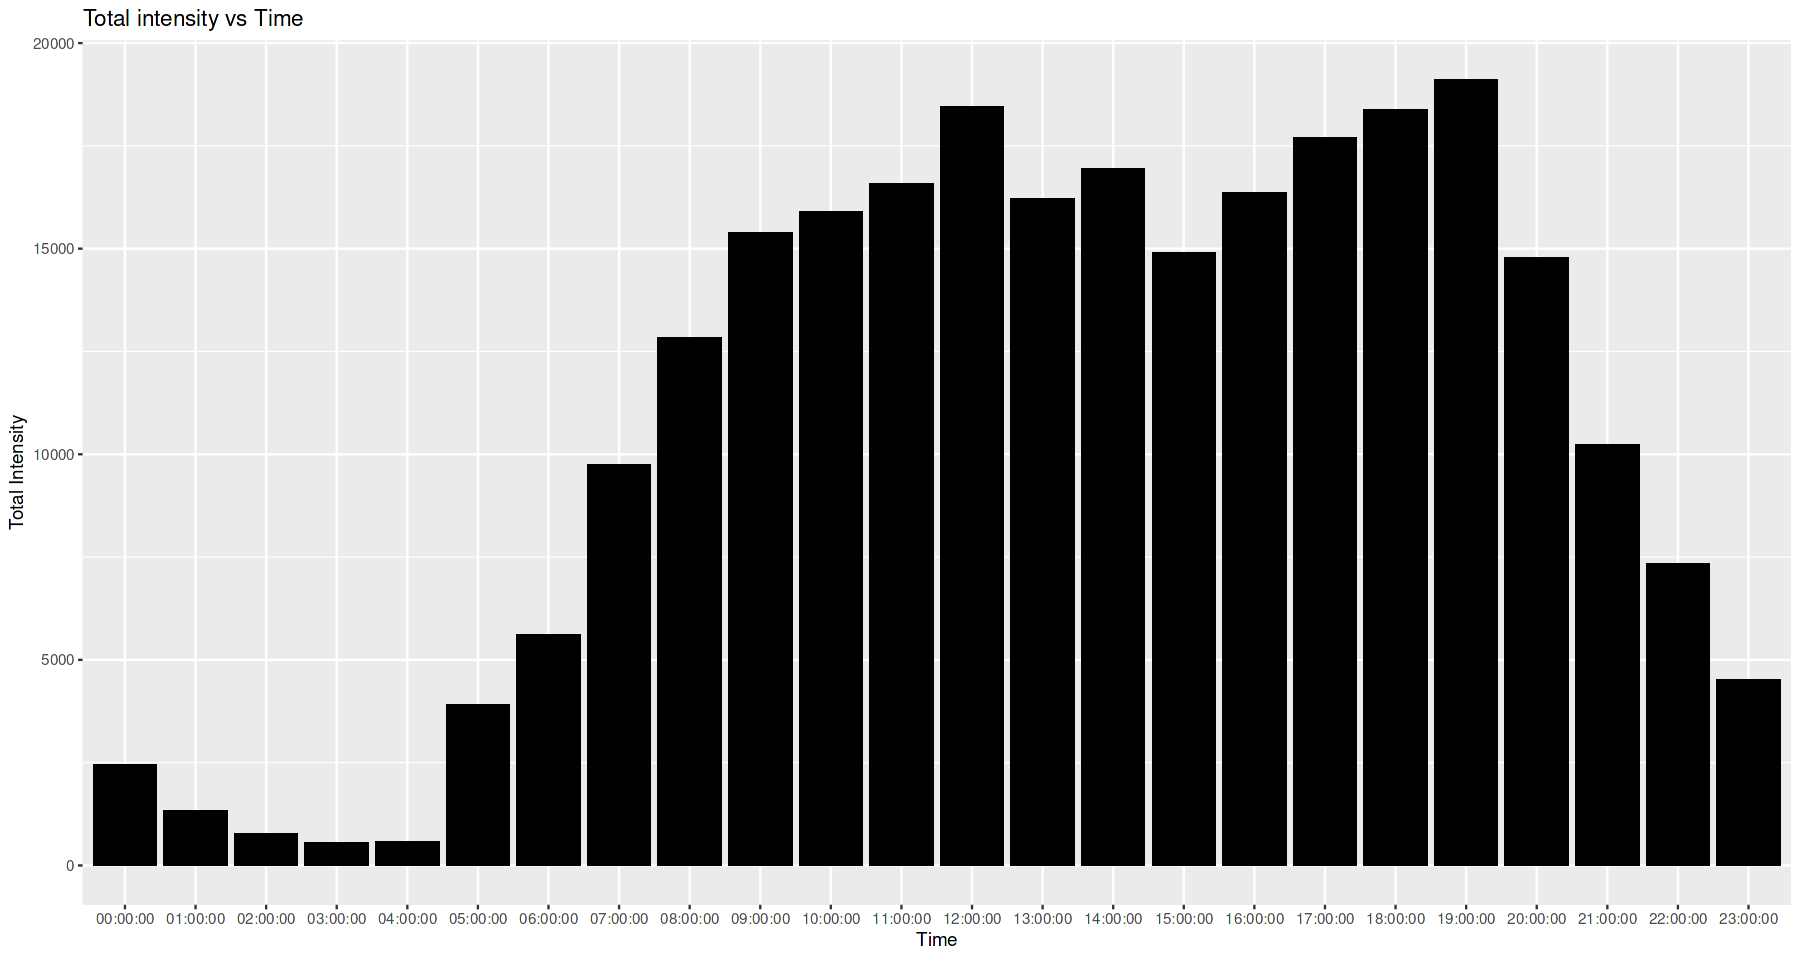

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8)
intensity_1<-intensity %>% 
  group_by(Id,time) %>% 
  summarize(TotalIntensity=sum(TotalIntensity))

ggplot(data=intensity_1,aes(x=time,y=TotalIntensity))+
  geom_bar(stat="identity",fill="black")+
  ggtitle("Total intensity vs Time")+
  xlab("Time")+
  ylab("Total Intensity")

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


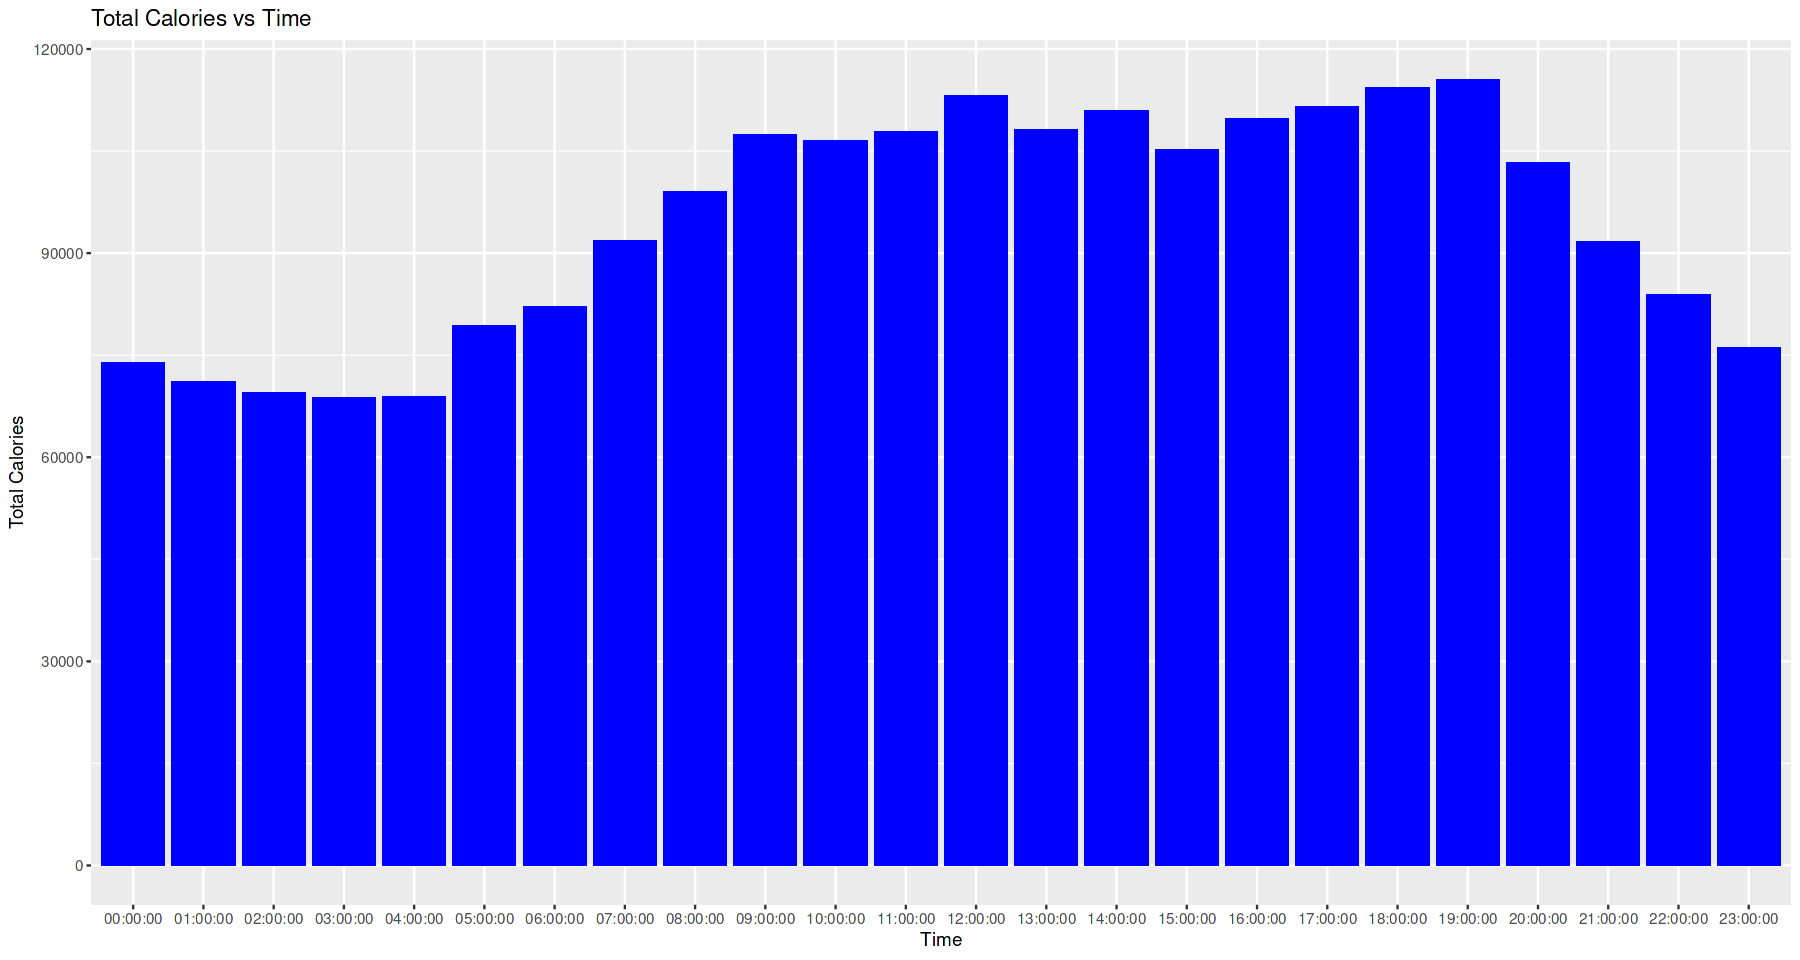

In [12]:
calories_1<-calories %>% 
  group_by(Id,time) %>% 
  summarize(Calories=sum(Calories))

ggplot(data=calories_1,aes(x=time,y=Calories))+
  geom_bar(stat="identity",fill="blue")+
  ggtitle("Total Calories vs Time")+
  xlab("Time")+
  ylab("Total Calories")

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


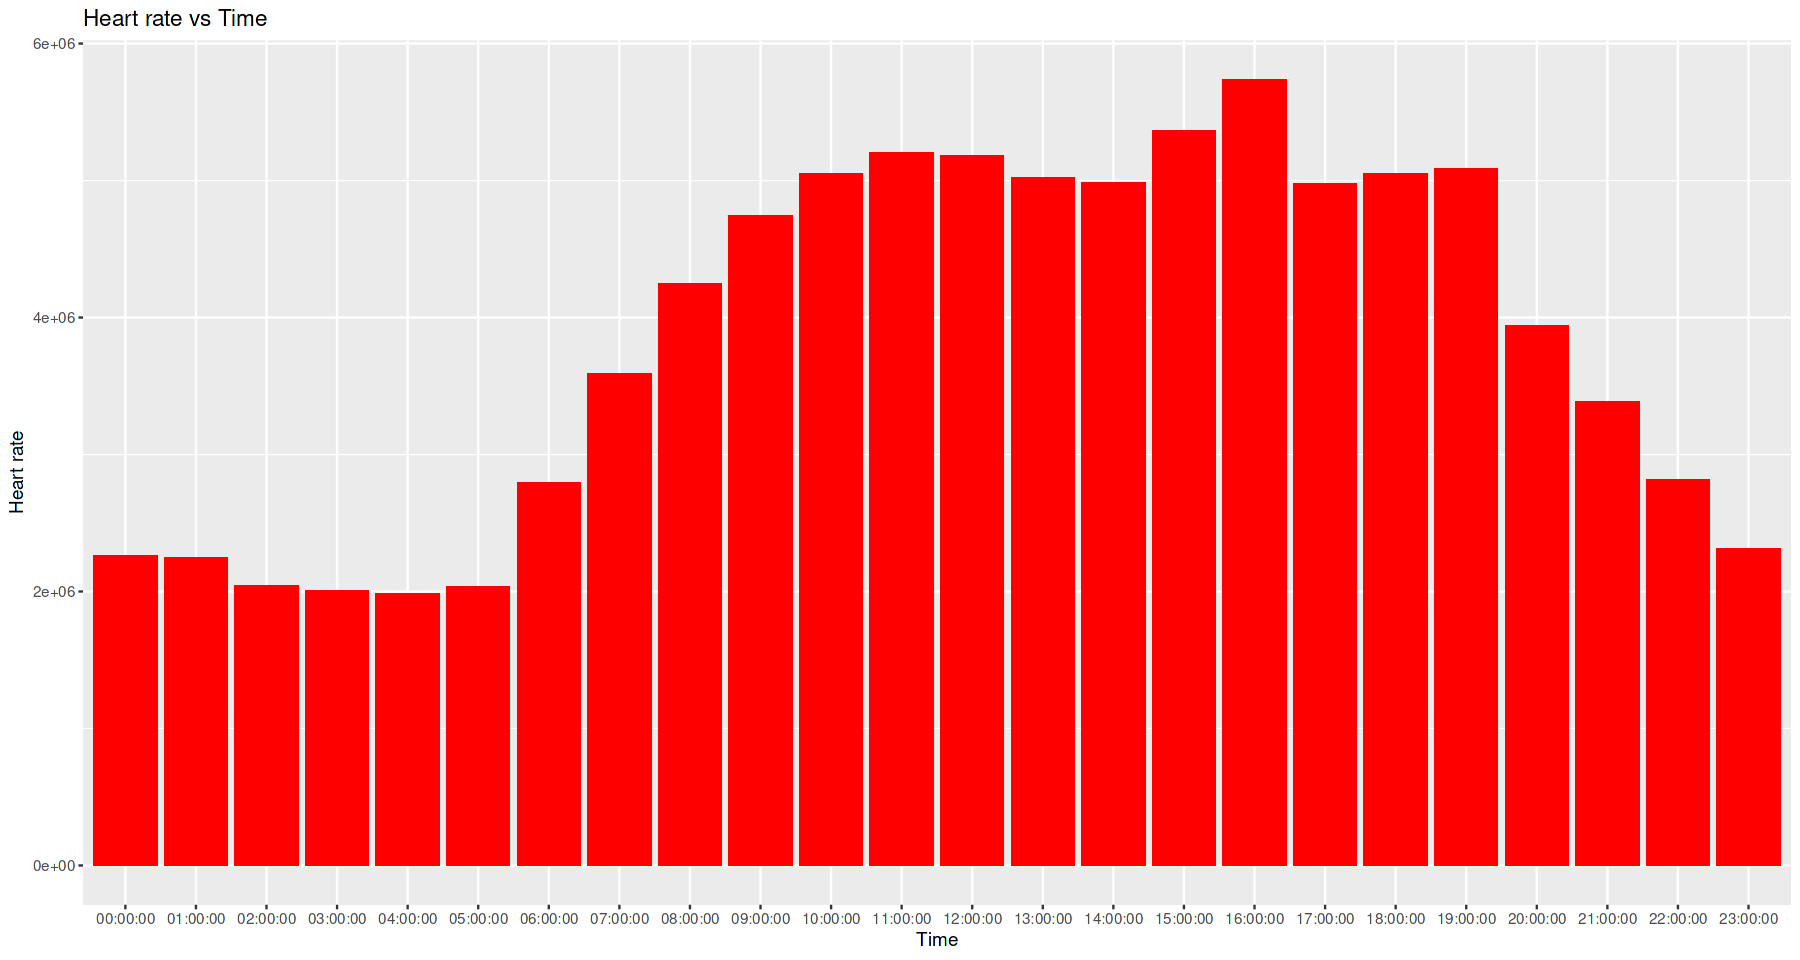

In [13]:
heart_rate_1<-heart_rate %>% 
  group_by(Id,time) %>% 
  summarize(Value=sum(Value))

ggplot(data=heart_rate_1,aes(x=time,y=Value))+
  geom_bar(stat="identity",fill="red")+
  ggtitle("Heart rate vs Time")+
  xlab("Time")+
  ylab("Heart rate")

#### Major takeaways:<br>
##### 1. People are mostly active between 5am to 10pm.
##### 2. Majority of the activity happens betweem 5pm to 7pm. I suppose people            usually go out for a walk or go to the gym in this time.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


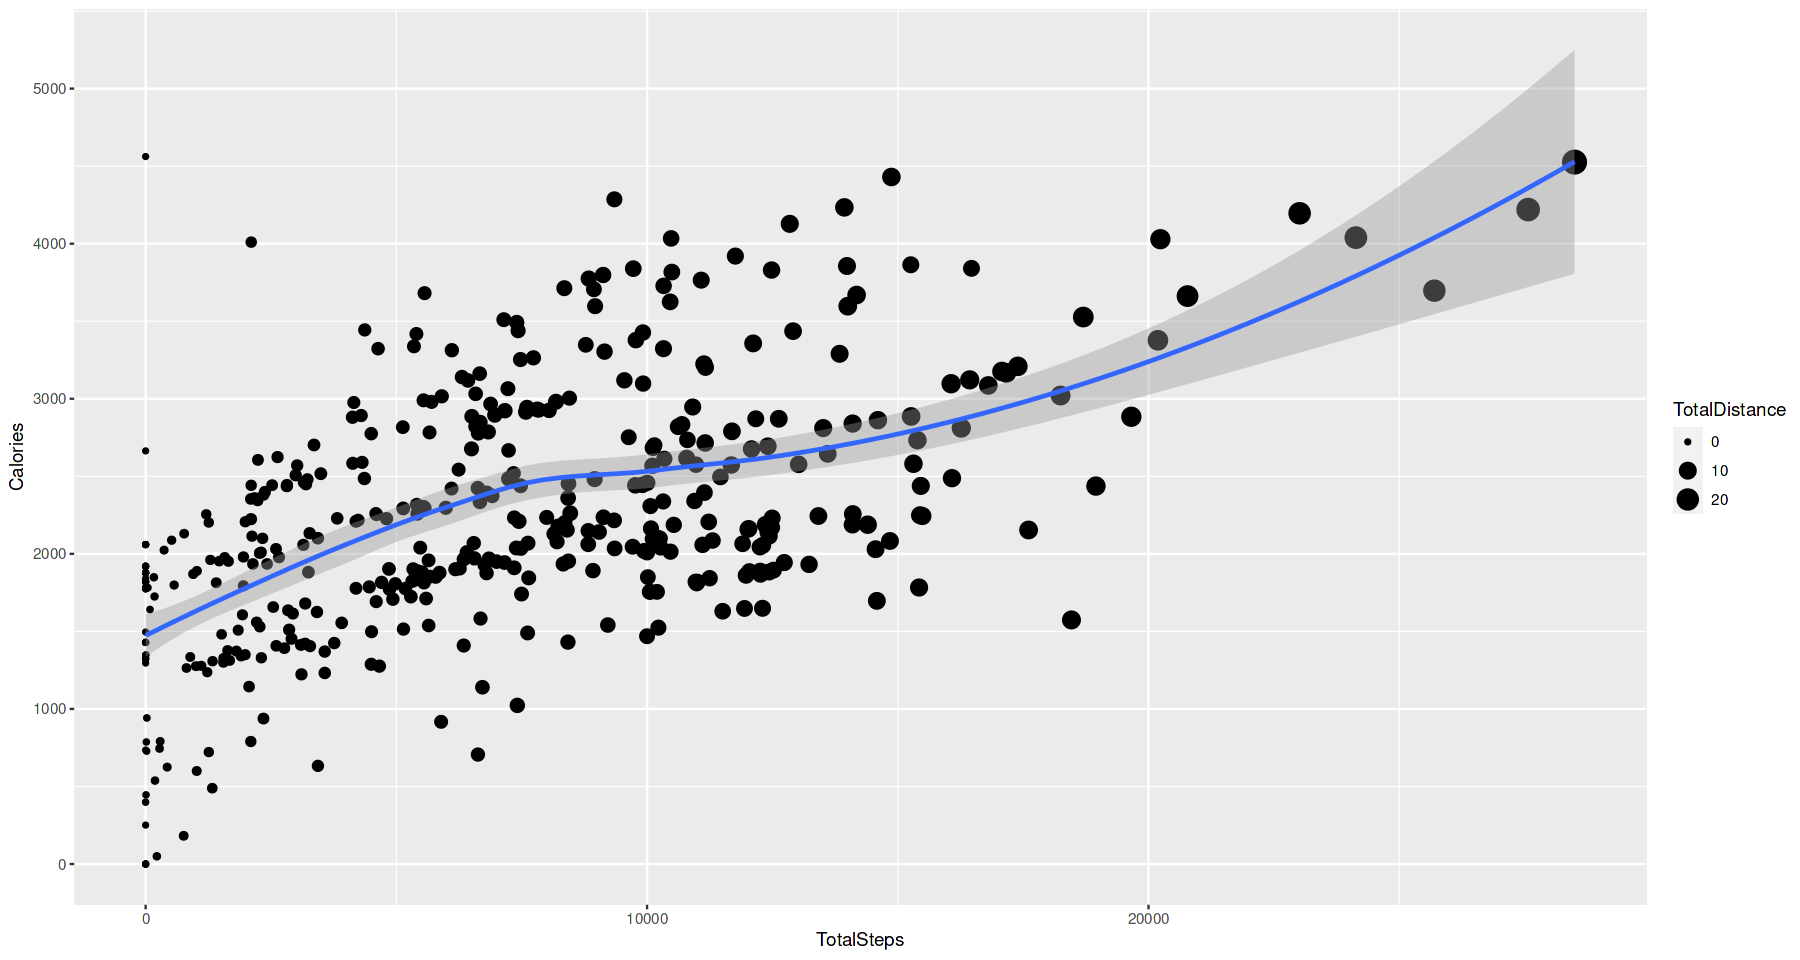

In [14]:
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=TotalSteps,y=Calories,size=TotalDistance))+
  geom_smooth(mapping=aes(x=TotalSteps,y=Calories))

##### We see a positive correlation between total steps and calories burned. This implies the more we walk, the greater distance we cover and the more calories we burn. 

## Now let's merge our datsets to find the correlation between them.

In [15]:
heart_rate_intensity<-merge(heart_rate_1, intensity_1, by=c('Id','time'))
calories_heart_rate<-merge(calories_1,heart_rate_1,by=c('Id','time'))
calories_intensity<-merge(calories_1,intensity_1,by=c('Id','time'))

head(heart_rate_intensity)
head(calories_heart_rate)
head(calories_intensity)


,Id,time,Value,TotalIntensity
,<dbl>,<chr>,<dbl>,<dbl>
1,2022484408,05:00:00,26286,28
2,2022484408,06:00:00,39123,31
3,2022484408,07:00:00,130219,291
4,2022484408,08:00:00,296161,721
5,2022484408,09:00:00,504855,2549
6,2022484408,10:00:00,446373,1760


,Id,time,Calories,Value
,<dbl>,<chr>,<dbl>,<dbl>
1,2022484408,05:00:00,2047,26286
2,2022484408,06:00:00,2071,39123
3,2022484408,07:00:00,2791,130219
4,2022484408,08:00:00,3939,296161
5,2022484408,09:00:00,8577,504855
6,2022484408,10:00:00,6430,446373


,Id,time,Calories,TotalIntensity
,<dbl>,<chr>,<dbl>,<dbl>
1,1503960366,00:00:00,1858,199
2,1503960366,01:00:00,1615,68
3,1503960366,02:00:00,1591,63
4,1503960366,03:00:00,1526,34
5,1503960366,04:00:00,1474,2
6,1503960366,05:00:00,1487,6


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


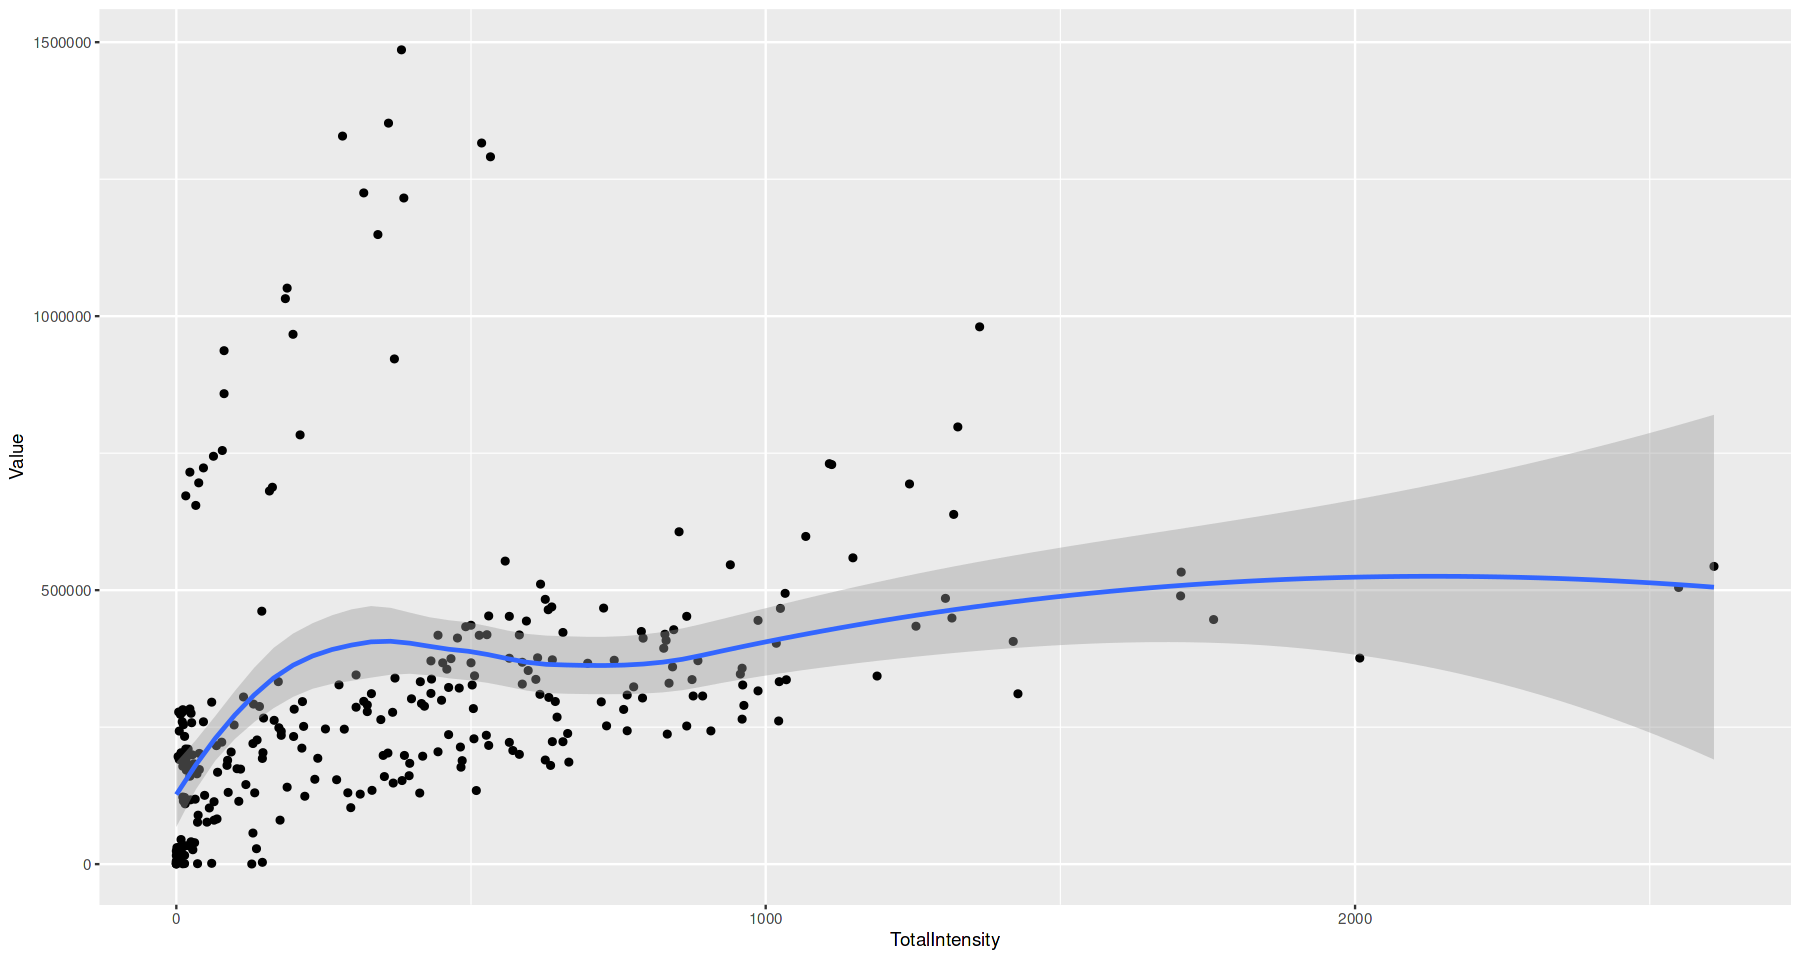

In [16]:
ggplot(data=heart_rate_intensity)+
  geom_point(mapping=aes(x=TotalIntensity, y=Value))+
 geom_smooth(mapping=aes(x=TotalIntensity, y=Value))

##### There is somewhat of a positive correlation between heart  rate and intensity.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


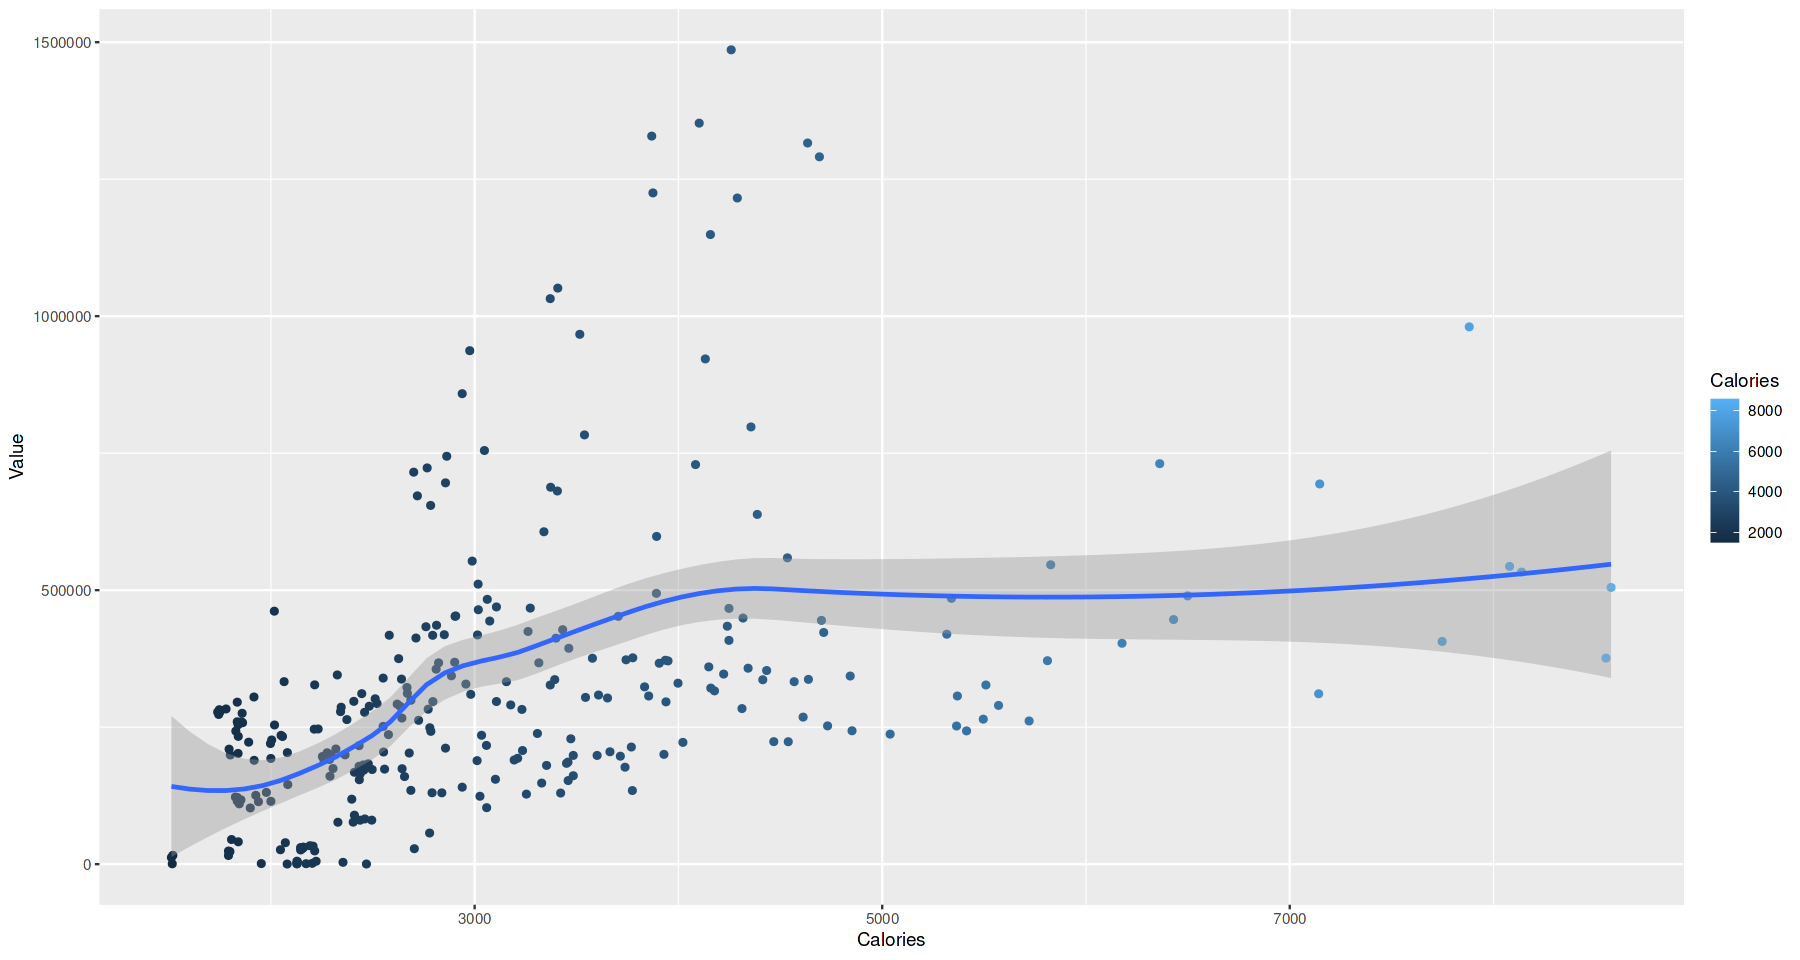

In [17]:
calories_heart_rate<-merge(calories_1,heart_rate_1,by=c('Id','time'))
ggplot(data=calories_heart_rate)+
  geom_point(mapping=aes(x=Calories, y=Value,colour=Calories))+
  geom_smooth(mapping=aes(x=Calories, y=Value))

##### We can see a partial positive correlation between calories burned and heart rate. We see a positive correlation for a some amount of calories burned after which the slope becomes parallel to the x-axis 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


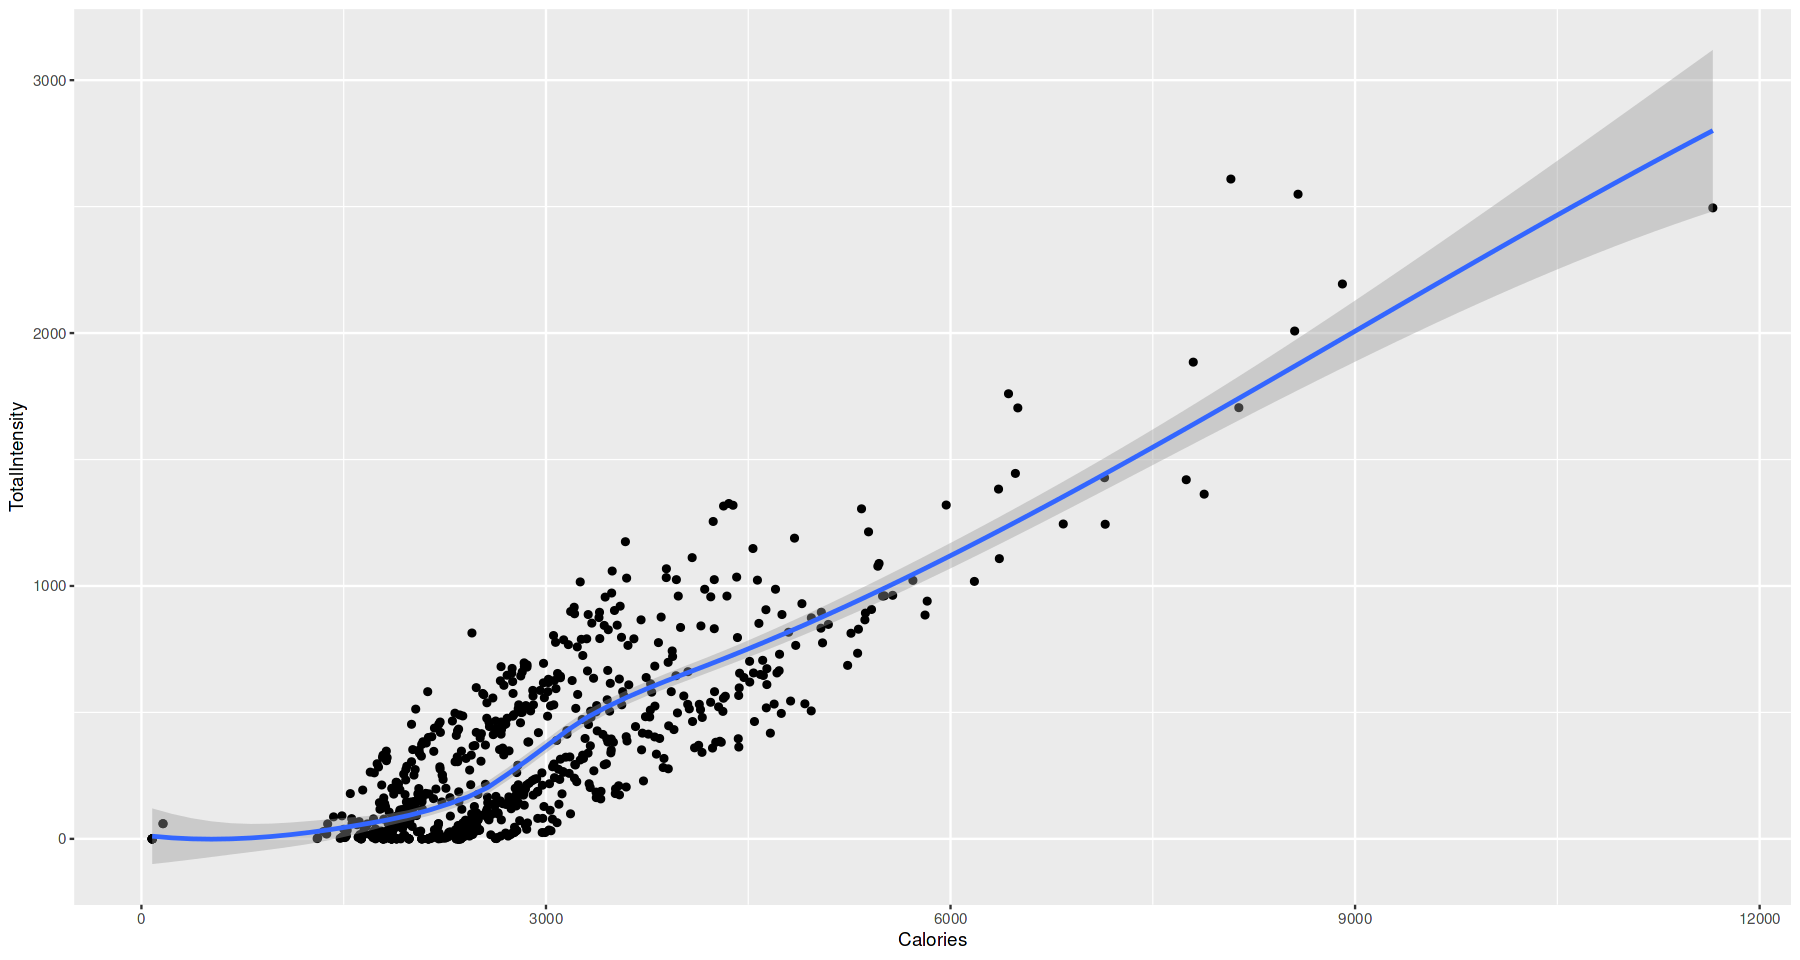

In [18]:
calories_intensity<-merge(calories_1,intensity_1,by=c('Id','time'))

ggplot(data=calories_intensity)+
  geom_point(mapping=aes(x=Calories, y=TotalIntensity))+
  geom_smooth(mapping=aes(x=Calories, y=TotalIntensity))

##### There is a positive correlation between calories burned and intensity.

## Recommendations for driving Bellabeat's marketing strategy:

### Based on my findings, here are some detailed recommendations for BellaBeat's marketing campaign:

**1.Promote Light Activity Throughout the Day**

  People are mostly lightly active in the total distance they cover.
   Encourage users to incorporate more light activity throughout their day with prompts                   and challenges. BellaBeat could create a campaign promoting the benefits of taking                     short,frequent walks or standing up and stretching every hour.
  
**2.Address High Sedentary Minutes**

 Sedentary minutes are high, which definitely needs to be reduced.
 Launch initiatives to reduce sedentary behavior by providing tips and reminders to                       stay active. BellaBeat could introduce features like sedentary alerts to remind users                   to move after long periods of inactivity, along with educational content about the                     risks of prolonged sedentary time and the benefits of regular movement.

**3.Optimize Engagement During Peak Activity Hours**

 People are mostly active between 5 am to 10 pm.
 Focus marketing efforts on these peak hours by sending motivational messages and tips for staying active. BellaBeat could offer tailored workout suggestions, quick exercise routines, or mindfulness practices during these times to maximize engagement.

**4.Leverage Evening Activity Peaks**

Majority of the activity happens between 5 pm to 7 pm.
Use this time to remind and motivate users to go for a run or walk. BellaBeat can send push notifications or emails with encouraging messages, success stories, or group challenges to inspire users to stay active in the evening. Consider partnering with local gyms or fitness instructors for virtual workout sessions during these hours.

**5.Highlight the Benefits of Walking**

Positive correlation between total steps and calories burned.
Emphasize the benefits of walking for fitness and weight management in marketing campaigns. BellaBeat could launch step challenges, reward programs, or community events focused on walking to motivate users to increase their daily step count.

**6.Promote High-Intensity Activities**

Positive correlation between heart rate and intensity, and between calories burned and intensity.
Encourage users to engage in high-intensity workouts by highlighting the efficient calorie-burning potential and cardiovascular benefits. BellaBeat could provide high-intensity interval training (HIIT) routines, track heart rate during workouts, and offer personalized feedback and rewards for achieving higher intensity levels.

**7.Educate on the Relationship Between Heart Rate and Calories Burned**

Partial positive correlation between calories burned and heart rate.
Provide educational content to users about the relationship between heart rate and calorie expenditure, explaining why heart rate levels off after a certain point. BellaBeat could offer insights into how to optimize workouts for maximum calorie burn and overall fitness.<br>
<br>
By implementing these recommendations, BellaBeat can effectively leverage the data insights to create a more engaging and motivating user experience, ultimately driving higher activity levels and better health outcomes for their users.